# Analitiche con Pandas - 1. introduzione


## [Scarica zip esercizi](../_static/generated/pandas.zip)

[Naviga file online](https://github.com/DavidLeoni/softpython-it/tree/master/pandas)


Python mette a disposizione degli strumenti potenti per l'analisi dei dati - uno dei principali è [Pandas](https://pandas.pydata.org/), che fornisce strutture di dati veloci e flessibili, soprattutto per l'analisi dei dati in tempo reale. Pandas riusa librerie esistenti che abbiamo già visto come Numpy:

![pydata-8243](img/pydata.png)


In questa prima parte del tutorial vedremo:

* Operazioni di filtraggio e trasformazione su dataframe Pandas
* Plotting con MatPlotLib
* Esempi con dataset AstroPi
* Esercizi con dataset meteotrentino e altri

## 1. Che fare


- scompatta lo zip in una cartella, dovresti ottenere qualcosa del genere: 

```
pandas
    pandas1-intro.ipynb     
    pandas1-intro-sol.ipynb  
    pandas2-advanced.ipynb    
    pandas2-advanced-sol.ipynb
    pandas3-chal.ipynb
    jupman.py     
```

<div class="alert alert-warning">

**ATTENZIONE**: Per essere visualizzato correttamente, il file del notebook DEVE essere nella cartella szippata.
</div>

- apri il Jupyter Notebook da quella cartella. Due cose dovrebbero aprirsi, prima una console e poi un browser. Il browser dovrebbe mostrare una lista di file: naviga la lista e apri il notebook `pandas1-intro.ipynb`
- Prosegui leggendo il file degli esercizi, ogni tanto al suo interno troverai delle scritte **ESERCIZIO**, che ti chiederanno di scrivere dei comandi Python nelle celle successive. 

Scorciatoie da tastiera:

* Per eseguire il codice Python dentro una cella di Jupyter, premi `Control+Invio`
* Per eseguire il codice Python dentro una cella di Jupyter E selezionare la cella seguente, premi `Shift+Invio`
* Per eseguire il codice Python dentro una cella di Jupyter E creare una nuova cella subito dopo, premi `Alt+Invio`
* Se per caso il Notebook sembra inchiodato, prova a selezionare `Kernel -> Restart`




### Controlla l'installazione

Prima di tutto vediamo se hai già installato pandas sul tuo sistema, prova ad eseguire questa cella con `Ctrl Enter`:

In [1]:
import pandas as pd

Se non hai visto messaggi di errore, puoi saltare l'installazione, altrimenti fai così:

* Se hai Anaconda - apri l'Anaconda Prompt e metti:

`conda install pandas`

* Senza Anaconda: (`--user` installa nella propria home):


`python3 -m pip install --user pandas`

### Quale pandas usare?

In questo tutorial adottiamo la versione 1 di pandas che è basata su numpy, perchè al momento (2023) è la più diffusa e di solito i tutorial che trovate in giro si riferiscono a questa versione. Va considerato che ad Aprile 2023 è uscita la versione 2 che è più efficiente, può supportare opzionalmente l'engine [PyArrow](https://levelup.gitconnected.com/welcoming-pandas-2-0-194094e4275b) e ha un miglior supporto per tipi 'nullabili'.

## 2. Analisi dei dati di Astro Pi


Proviamo ad analizzare i dati registrati da una scheda elettronica RaspberryPi presente sulla Stazione Spaziale Internazionale (ISS in breve), scaricati da qui:

[https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis](https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis)

Nel sito è possibile trovare la descrizione dettagliata dei dati raccolti dai sensori, nel mese di febbraio 2016 (un record ogni 10 secondi). 
![iss-2985744](img/iss.jpg)

### 2.1 Importiamo il file

Il metodo ```read_csv``` importa i dati da un file CSV e li memorizza in una struttura DataFrame.

In questo esercizio useremo il file [astropi.csv](astropi.csv) (modificato rispetto all'originale sostituendo il campo ROW_ID con time_stamp)

In [2]:
import pandas as pd   # importiamo pandas e per comodità lo rinominiamo in  'pd'
import numpy as np    # importiamo numpy e per comodità lo rinominiamo in 'np'

# ricordatevi l'encoding !
df = pd.read_csv('astropi.csv', encoding='UTF-8')  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time_stamp  110869 non-null  object 
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
dtypes:

### 2.2 Memoria

Pandas carica il dataset dal disco nella memoria RAM del tuo computer (che nel 2023 è tipicamente di 8 gigabyte). Se per caso il tuo dataset fosse più grande della memoria RAM, riceveresti un errore e dovresti cominciare a pensare ad usare altri strumenti per fare le tue analisi. Potrebbero sorgere anche problemi nel caso decidessi di fare successivamente copie del dataframe. E' quindi molto importante capire quanto occupa. Se guardi in fondo, vedrai scritto _memory usage: 16.1+ MB_ ma **attenzione a quel** `+`: Pandas ci sta dicendo che il dataset occupa in RAM _almeno_ 16.1Mb, ma la dimensione effettiva potrebbe essere maggiore. 

Per vedere lo spazio occupato vero, prova ad aggiungere alla chiamata di `df.info` il parametro `memory_usage="deep"` che è opzionale perchè a seconda del dataset potrebbe richiedere più tempo di calcolo. Noti differenze?

- quanto occupa il file del dataset originale sul tuo disco? Prova a scoprirlo guardando in Esplora risorse. 

In [3]:

# scrivi qui
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time_stamp  110869 non-null  object 
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
dtypes:

In [3]:

# scrivi qui



### 2.3 Dimensioni

Possiamo vedere rapidamente righe e colonne del dataframe con l'attributo `shape`:

**NOTA**: `shape` non è seguito da parentesi tonde !

In [4]:
df.shape

(110869, 19)

### 2.4 Esploriamo

In [5]:
df

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0


Nota che la prima colonna numerica in grassetto è un indice intero che Pandas ha automaticamente creato e assegnato al dataset al momento dell'apertura, e che parte da zero. Volendo, si potrebbe anche impostare un indice diverso ma in questo tutorial non lo faremo.

Il metodo `head()` restituisce le prime righe:

In [6]:
df.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0


Il metodo `tail()` restituisce le ultime righe:

In [7]:
df.tail()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0
110868,2016-02-29 09:25:00,31.57,27.51,24.83,42.94,1005.86,2.17,49.77,134.18,-17.885872,-27.824149,1.293345,-0.000787,0.017261,0.014380,0.000459,0.000076,0.000030,0


### 2.5 Qualche statistica
 
Il metodo `describe` vi da al volo tutta una serie di dati di riepilogo:

* il conteggio delle righe
* la media
* [la deviazione standard](https://it.wikipedia.org/wiki/Scarto_quadratico_medio)
* [i quartili](https://it.wikipedia.org/wiki/Quantile)
* minimo e massimo

In [8]:
df.describe()

,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
count,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.00000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,1.108690e+05,110869.000000,1.108690e+05,110869.000000
mean,32.236259,28.101773,25.543272,46.252005,1008.126788,2.770553,51.807973,200.90126,-19.465265,-1.174493,-6.004529,-0.000630,0.018504,0.014512,-8.959493e-07,0.000007,-9.671594e-07,0.000180
std,0.360289,0.369256,0.380877,1.907273,3.093485,21.848940,2.085821,84.47763,28.120202,15.655121,8.552481,0.000224,0.000604,0.000312,2.807614e-03,0.002456,2.133104e-03,0.060065
min,31.410000,27.200000,24.530000,42.270000,1001.560000,0.000000,30.890000,0.01000,-73.046240,-43.810030,-41.163040,-0.025034,-0.005903,-0.022900,-3.037930e-01,-0.378412,-2.970800e-01,0.000000
25%,31.960000,27.840000,25.260000,45.230000,1006.090000,1.140000,51.180000,162.43000,-41.742792,-12.982321,-11.238430,-0.000697,0.018009,0.014349,-2.750000e-04,-0.000278,-1.200000e-04,0.000000
50%,32.280000,28.110000,25.570000,46.130000,1007.650000,1.450000,51.950000,190.58000,-21.339485,-1.350467,-5.764400,-0.000631,0.018620,0.014510,-3.000000e-06,-0.000004,-1.000000e-06,0.000000
75%,32.480000,28.360000,25.790000,46.880000,1010.270000,1.740000,52.450000,256.34000,7.299000,11.912456,-0.653705,-0.000567,0.018940,0.014673,2.710000e-04,0.000271,1.190000e-04,0.000000
max,33.700000,29.280000,26.810000,60.590000,1021.780000,360.000000,359.400000,359.98000,33.134748,37.552135,31.003047,0.018708,0.041012,0.029938,2.151470e-01,0.389499,2.698760e-01,20.000000


**DOMANDA**: Manca qualche campo alla tabella prodotta da `describe`? Perchè non l'ha incluso ? 

Il metodo `corr` permette di calcolare la correlazione tra le colonne del DataFrame, con valori da `-1.0` a `+1.0`:

In [9]:
df.corr()

,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
temp_cpu,1.000000,0.986872,0.991672,-0.297081,0.038065,0.008076,-0.171644,-0.117972,0.005145,-0.285192,-0.120838,-0.023582,-0.446358,-0.029155,0.002511,0.005947,-0.001250,-0.002970
temp_h,0.986872,1.000000,0.993260,-0.281422,0.070882,0.005145,-0.199628,-0.117870,0.000428,-0.276276,-0.098864,-0.032188,-0.510126,-0.043213,0.001771,0.005020,-0.001423,-0.004325
temp_p,0.991672,0.993260,1.000000,-0.288373,0.035496,0.006750,-0.163685,-0.118463,0.004338,-0.283427,-0.114407,-0.018047,-0.428884,-0.036505,0.001829,0.006127,-0.001623,-0.004205
humidity,-0.297081,-0.281422,-0.288373,1.000000,0.434374,0.004050,0.101304,0.031664,-0.035146,0.077897,0.076424,-0.009741,0.226281,0.005281,0.004345,0.003457,0.001298,-0.002066
pressure,0.038065,0.070882,0.035496,0.434374,1.000000,0.003018,0.011815,-0.051697,-0.040183,-0.074578,0.092352,0.013556,-0.115642,-0.221208,-0.000611,-0.002493,-0.000615,-0.006259
pitch,0.008076,0.005145,0.006750,0.004050,0.003018,1.000000,0.087941,-0.011611,0.013331,0.006133,0.000540,0.043285,0.009015,-0.039146,0.066618,-0.015034,0.049340,-0.000176
roll,-0.171644,-0.199628,-0.163685,0.101304,0.011815,0.087941,1.000000,0.095354,-0.020947,0.060297,-0.080620,0.116637,0.462630,-0.167905,-0.115873,-0.002509,-0.214202,0.000636
yaw,-0.117972,-0.117870,-0.118463,0.031664,-0.051697,-0.011611,0.095354,1.000000,0.257971,0.549394,-0.328360,0.006943,0.044157,-0.013634,0.003106,0.003665,0.004020,-0.000558
mag_x,0.005145,0.000428,0.004338,-0.035146,-0.040183,0.013331,-0.020947,0.257971,1.000000,0.001239,-0.213070,-0.006629,0.027921,0.021524,-0.004954,-0.004429,-0.005052,-0.002879
mag_y,-0.285192,-0.276276,-0.283427,0.077897,-0.074578,0.006133,0.060297,0.549394,0.001239,1.000000,-0.266351,0.014057,0.051619,-0.053016,0.001239,0.001063,0.001530,-0.001335


### 2.6 Guardiamo le colonne

La proprietà `colums` restituisce le intestazioni di colonna:

In [10]:
df.columns

Index(['time_stamp', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw', 'mag_x', 'mag_y', 'mag_z', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'reset'],
      dtype='object')

Come si vede qua sopra, il tipo dell'oggetto ritornato non è una lista, ma un contenitore speciale definito da pandas:

In [11]:
type(df.columns)

pandas.core.indexes.base.Index

Ciononostante, possiamo accedere agli elementi di questo contenitore usando indici dentro le parentesi quadre:

In [12]:
df.columns[0]

'time_stamp'

In [13]:
df.columns[1]

'temp_cpu'

### 2.7 Cos'è una colonna?

Possiamo accedere ad una colonna così:

In [14]:
df['humidity']

0         44.94
1         45.12
2         45.12
3         45.32
4         45.18
          ...  
110864    42.94
110865    42.72
110866    42.83
110867    42.81
110868    42.94
Name: humidity, Length: 110869, dtype: float64

Ancora più comodamente, puoi usare la notazione con il punto:

In [15]:
df.humidity

0         44.94
1         45.12
2         45.12
3         45.32
4         45.18
          ...  
110864    42.94
110865    42.72
110866    42.83
110867    42.81
110868    42.94
Name: humidity, Length: 110869, dtype: float64

<div class="alert alert-warning">

**ATTENZIONE: sembrano due colonne, ma in realtà è solo una!**
</div>

La lista di numeri a sinistra è l'indice intero che Pandas ha automaticamente assegnato al dataset al momento dell'apertura (parte da zero). 

<div class="alert alert-warning">

**ATTENZIONE agli spazi!**

Nel caso il nome del campo avesse degli spazi (es. `'rotazioni frullatore'`), **non** si può usare la notazione con il punto ma si è costretti ad usare la notazione con le quadre vista sopra  (es: `df.['rotazioni frullatore']`)
    
</div>

Il tipo di una colonna è `Series`:

In [16]:
type(df.humidity)

pandas.core.series.Series

Alcune operazioni funzionano anche sulle colonne singole, per esempio `describe()`:

In [17]:
df.humidity.describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

### 2.8 Esercizio - info meteo

✪ a. Crea un nuovo dataframe ```meteo``` importando i dati dal file [meteo.csv](meteo.csv), che contiene i dati meteo di Trento di novembre 2017 (fonte: [www.meteotrentino.it](https://www.meteotrentino.it)). **IMPORTANTE**: assegna il dataframe ad una variabile chiamata `meteo` (così evitiamo confusione con il dataframe dell'AstroPi)

b. Visualizza le informazioni relative a questo Dataframe.

In [18]:
# scrivi qui - crea il dataframe

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
print("COLONNE:", ', '.join(meteo.columns))
print()
print("INFO:")
meteo.info(memory_usage="deep")
print()
print("PRIME RIGHE:")

print(meteo.head())

COLONNE: Data, Pressione, Pioggia, Temp

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       2878 non-null   object 
 1   Pressione  2878 non-null   float64
 2   Pioggia    2878 non-null   float64
 3   Temp       2878 non-null   float64
dtypes: float64(3), object(1)
memory usage: 272.7 KB

PRIME RIGHE:
               Data  Pressione  Pioggia  Temp
0  01/11/2017 00:00      995.4      0.0   5.4
1  01/11/2017 00:15      995.5      0.0   6.0
2  01/11/2017 00:30      995.5      0.0   5.9
3  01/11/2017 00:45      995.7      0.0   5.4
4  01/11/2017 01:00      995.7      0.0   5.3


In [18]:
# scrivi qui - crea il dataframe



COLONNE: Data, Pressione, Pioggia, Temp

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       2878 non-null   object 
 1   Pressione  2878 non-null   float64
 2   Pioggia    2878 non-null   float64
 3   Temp       2878 non-null   float64
dtypes: float64(3), object(1)
memory usage: 272.7 KB

PRIME RIGHE:
               Data  Pressione  Pioggia  Temp
0  01/11/2017 00:00      995.4      0.0   5.4
1  01/11/2017 00:15      995.5      0.0   6.0
2  01/11/2017 00:30      995.5      0.0   5.9
3  01/11/2017 00:45      995.7      0.0   5.4
4  01/11/2017 01:00      995.7      0.0   5.3


## 3. Rivediamo MatPlotLib

Abbiamo già visto MatplotLib nel [tutorial sulla visualizzazione](http://it.softpython.org/visualization/visualization-sol.html), e oggi lo useremo per disegnare grafici.

### 3.1 Un esempio 

Proviamo a plottere una grafico usando l'approccio in _stile Matlab_, passando due liste di coordinate, una per le x e una per le y:

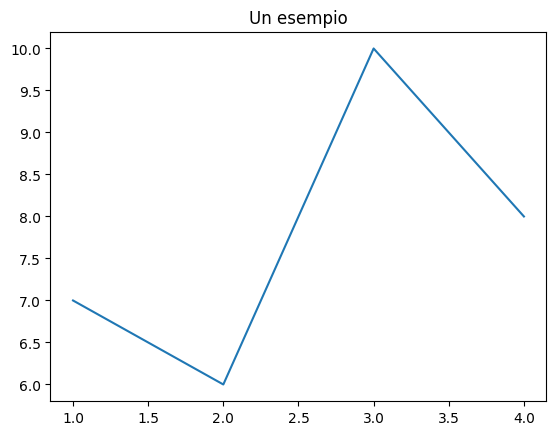

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

xs = [1, 2, 3, 4]
ys = [7, 6,10, 8]
plt.plot(xs, ys) # possiamo direttamente passare liste per le x e y
plt.title('Un esempio')
plt.show()


Possiamo anche creare serie con numpy. Proviamo a fare una parabola:

In [20]:
import numpy as np
x = np.arange(0.,5.,0.1)
#  '**' è l'operatore di elevamento a potenza in Python, NON '^'
y = x**2  

Utilizziamo la funzione `type` per capire che tipo di dati sono x e y:

In [21]:
type(x)

numpy.ndarray

In [22]:
type(y)

numpy.ndarray

Si tratta quindi di vettori di NumPy.

Plottiamoli:

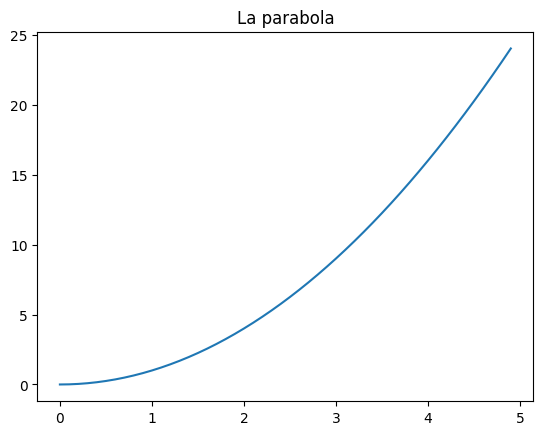

In [23]:
plt.title('La parabola')
plt.plot(x,y);

Se vogliamo che le unità dell'asse x siano della stessa dimensione di quelle dell'asse y, possiamo utilizzare la funzione [gca](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html?highlight=matplotlib%20pyplot%20gca#matplotlib.pyplot.gca)

Per settare i limiti delle x e delle y, possiamo usare `xlim` e `ylim`:

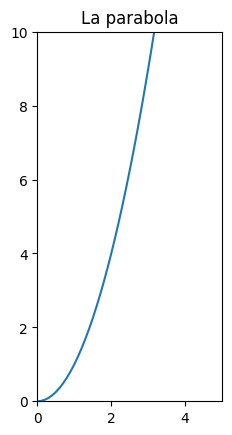

In [24]:
plt.xlim([0, 5])
plt.ylim([0,10])
plt.title('La parabola')

plt.gca().set_aspect('equal')
plt.plot(x,y);

### 3.2 Grafici matplotlib da strutture pandas

Si possono ricavare grafici direttamente da strutture pandas usando lo _stile matlab_. Facciamo un esempio semplice, per casi più complessi rimandiamo alla documentazione di [DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html). 

In caso di un numero molto elevato di dati, può essere utile avere un'idea qualitativa dei dati, mettendoli in grafico:

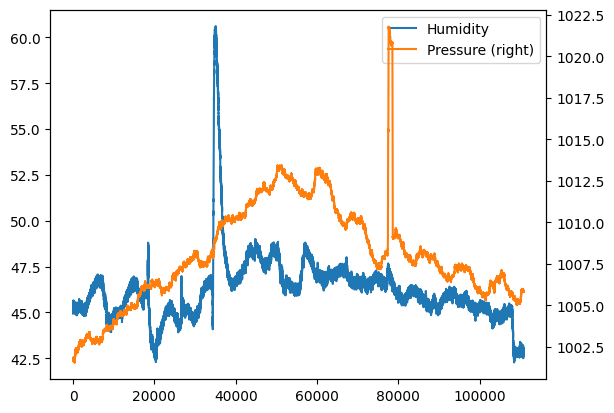

In [25]:
df.humidity.plot(label="Humidity", legend=True)
# con secondary_y=True facciamo apparire i numeri per l'asse delle y
# del secondo grafico sulla destra
df.pressure.plot(secondary_y=True, label="Pressure", legend=True);

Volendo, è sempre possibile usare direttamente la funzione originale `plt.plot`, basta passargli una serie per le coordinate x e una per le y. Per esempio, se vogliamo replicare l'esempio di sopra per l'umidità, per le coordinate x potremmo estrarci  l'indice del dataframe che è un iterabile:

In [26]:
df.index

RangeIndex(start=0, stop=110869, step=1)

e passarlo come primo parametro a `plt.plot`. Come secondo parametro possiamo passare direttamente la serie dell'umidità, essendo anche quest'ultima un iterabile Python automaticamente riuscirà a prelevare i valori delle celle:

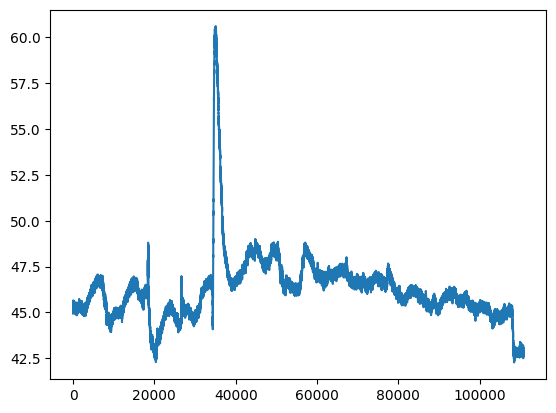

In [27]:
plt.plot(df.index, df['humidity'])
plt.show() # previene visualizzazione caratteri strani

## 4. Operazioni su righe

Se consideriamo le righe di un dataset, tipicamente le vorremo indicizzare, filtrare e ordinare.

### 4.1 Indicizzare con interi

Riportiamo qui l'indicizzazione più semplice tramite numeri di riga.

Per ottenere la _i_-esima serie si utilizza il metodo `iloc[i]` (qui riusiamo il dataset dell'AstroPI) :

In [28]:
df.iloc[6]

time_stamp    2016-02-16 10:45:41
temp_cpu                    31.68
temp_h                      27.53
temp_p                      25.01
humidity                    45.31
pressure                   1001.7
pitch                        0.63
roll                        53.55
yaw                         186.1
mag_x                  -50.447346
mag_y                   -7.937309
mag_z                  -12.188574
accel_x                  -0.00051
accel_y                  0.019264
accel_z                  0.014528
gyro_x                  -0.000111
gyro_y                    0.00032
gyro_z                   0.000222
reset                           0
Name: 6, dtype: object

&Egrave; possibile selezionare un dataframe di posizioni contigue, utilizzando lo _slicing_, come abbiamo già fatto per [stringhe](https://it.softpython.org/strings/strings2-sol.html#Slice) e [liste](https://it.softpython.org/lists/lists2-sol.html#Slice).

Qua per esempio selezioniamo le righe dalla 5 _inclusa_ alla 7 _esclusa_ :

In [29]:
df.iloc[5:7]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
5,2016-02-16 10:45:30,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0
6,2016-02-16 10:45:41,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0


Filtrando le righe possiamo 'zommare' nel dataset, selezionando per esempio nel nuovo dataframe `df2` le righe tra la 12500esima (inclusa) e la 15000esima (esclusa): 

In [30]:
df2=df.iloc[12500:15000]

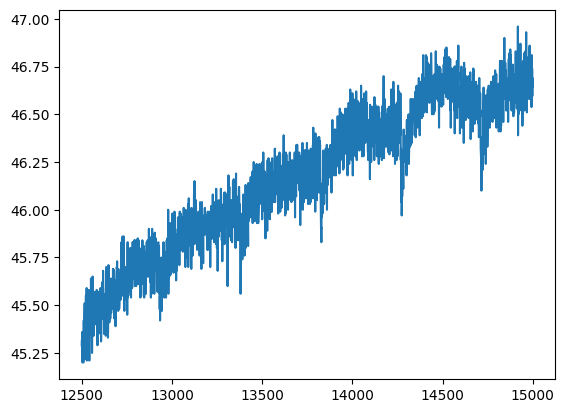

In [31]:
plt.plot(df2.index, df2['humidity'])
plt.show()

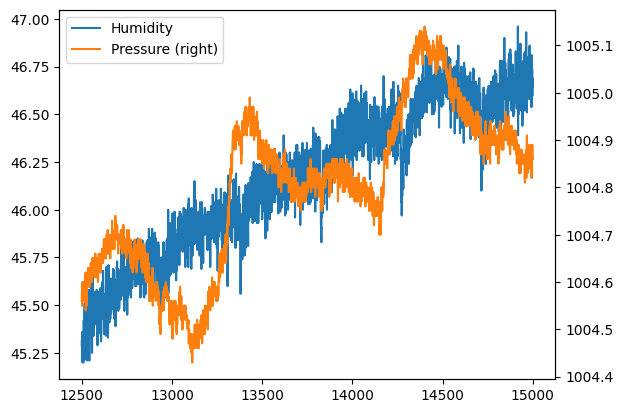

In [32]:
df2.humidity.plot(label="Humidity", legend=True)
df2.pressure.plot(secondary_y=True, label="Pressure", legend=True)
plt.show()  # previene visualizzazione caratteri strani

#### Differenza tra `iloc` e `loc`

`iloc` richiede sempre un _intero_ e ritorna sempre la riga nell'ordine naturale del dataframe che abbiamo in considerazione. 

`loc` invece ricerca _nell'indice assegnato da pandas_, che è quello rappresentato in grassetto quando mostriamo il dataset. 

Apparentemente sembrano simili ma la differenza tra `iloc` e `loc` si esplicita in particolare quando agiamo su dataset filtrati. Guardiamo le prime righe del dataset filtrato `df2`:

In [33]:
df2.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
12500,2016-02-17 21:44:31,31.87,27.7,25.15,45.29,1004.56,0.85,52.78,357.18,30.517177,2.892431,0.371669,-0.000618,0.019318,0.014503,-0.000135,-0.000257,0.000121,0
12501,2016-02-17 21:44:40,31.84,27.7,25.16,45.32,1004.58,0.97,52.73,357.32,30.364154,2.315241,0.043272,-0.001196,0.019164,0.014545,0.000254,0.000497,-0.000010,0
12502,2016-02-17 21:44:51,31.83,27.7,25.15,45.23,1004.55,1.40,52.84,357.76,29.760987,1.904932,0.037701,-0.000617,0.019420,0.014672,0.000192,0.000081,0.000024,0
12503,2016-02-17 21:45:00,31.83,27.7,25.15,45.36,1004.58,2.14,52.84,357.79,29.882673,1.624020,-0.249268,-0.000723,0.019359,0.014691,0.000597,0.000453,-0.000118,0
12504,2016-02-17 21:45:10,31.83,27.7,25.15,45.20,1004.60,1.76,52.98,357.78,29.641547,1.532007,-0.336724,-0.000664,0.019245,0.014673,0.000373,0.000470,-0.000130,0


Prendiamo in considerazione il numero `0`, in questo caso:

- `.iloc[0]` seleziona la riga iniziale
- `.loc[0]` seleziona la riga  _ad indice pandas_ con valore zero

**DOMANDA**: nel caso di `df2`, qual'è la riga iniziale? Che _indice di pandas_ ha?

**RISPOSTA**: la riga iniziale ha _indice di pandas_ `12500`

Vediamo la differenza di risultati. `df2.loc[0]` troverà effettivamente la riga zeresima:

In [34]:
df2.iloc[0]

time_stamp    2016-02-17 21:44:31
temp_cpu                    31.87
temp_h                       27.7
temp_p                      25.15
humidity                    45.29
pressure                  1004.56
pitch                        0.85
roll                        52.78
yaw                        357.18
mag_x                   30.517177
mag_y                    2.892431
mag_z                    0.371669
accel_x                 -0.000618
accel_y                  0.019318
accel_z                  0.014503
gyro_x                  -0.000135
gyro_y                  -0.000257
gyro_z                   0.000121
reset                           0
Name: 12500, dtype: object

Invece `df2.loc[0]` fallirà miseramente:

```python
df2.loc[0]
```

```python
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
~/.local/lib/python3.7/site-packages/pandas/core/indexes/range.py in get_loc(self, key, method, tolerance)
    384                 try:
--> 385                     return self._range.index(new_key)
    386                 except ValueError as err:

ValueError: 0 is not in range
```

Proviamo ad usare l'_indice assegnato da pandas_ per la riga zeresima:

In [35]:
df2.loc[12500]

time_stamp    2016-02-17 21:44:31
temp_cpu                    31.87
temp_h                       27.7
temp_p                      25.15
humidity                    45.29
pressure                  1004.56
pitch                        0.85
roll                        52.78
yaw                        357.18
mag_x                   30.517177
mag_y                    2.892431
mag_z                    0.371669
accel_x                 -0.000618
accel_y                  0.019318
accel_z                  0.014503
gyro_x                  -0.000135
gyro_y                  -0.000257
gyro_z                   0.000121
reset                           0
Name: 12500, dtype: object

Come previsto questo è trovato.

### 4.2 Filtrare

&Egrave; possibile filtrare i dati in base al soddisfacimento di una condizione, che si può esprimere indicando una colonna e un operatore di comparazione, per esempio: 

In [36]:
df.humidity < 45.2

0          True
1          True
2          True
3         False
4          True
          ...  
110864     True
110865     True
110866     True
110867     True
110868     True
Name: humidity, Length: 110869, dtype: bool

Vediamo che si tratta di una serie di valori `True` o `False`, a seconda se il valore di `df.humidity` è minore di `45.2`. Qual'è il tipo di questo risultato?

In [37]:
type(df.humidity < 45.2)

pandas.core.series.Series

#### Combinare filtri

In modo analogo al [filtraggio in Numpy](https://it.softpython.org/matrices-numpy/matrices-numpy1-sol.html#Filtrare), è possibile esprimere più condizioni con l'operatore speciale di congiunzione `&` 

`(df.humidity > 45.0) & (df.humidity < 45.2)` sarà una serie di valori `True` o `False`, se `df.humidity` è contemporaneamente maggiore di `45.0` e minore di `45.2`

In [38]:
type((df.humidity > 45.0) & (df.humidity < 45.2))

pandas.core.series.Series

#### Applicare un filtro

Se vogliamo le righe complete del dataframe che soddisfano la condizione, possiamo scrivere così: 

<div class="alert alert-warning">

**IMPORTANTE**:  usiamo `df` all'_esterno_ dell'espressione `df[     ]` iniziando e chiudendo con le parentesi quadrate per dire a Python che vogliamo filtrare sul dataframe `df`, e usiamo di nuovo `df` all'_interno_ delle quadre per indicare su _quali colonne_ e _quali righe_ vogliamo filtrare 

</div>

In [39]:
df[  (df.humidity > 45.0) & (df.humidity < 45.2) ]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0
5,2016-02-16 10:45:30,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0
10,2016-02-16 10:46:20,31.68,27.53,25.00,45.16,1001.72,1.32,53.52,186.24,-51.616473,-6.818130,-11.860839,-0.000530,0.019477,0.014500,0.000268,0.001194,0.000106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108001,2016-02-29 01:23:30,32.32,28.20,25.57,45.05,1005.74,1.32,50.04,338.15,15.549799,-1.424077,-9.087291,-0.000754,0.017375,0.014826,0.000908,0.000447,0.000149,0
108003,2016-02-29 01:23:50,32.28,28.18,25.57,45.10,1005.76,1.65,50.03,338.91,15.134025,-1.776843,-8.806690,-0.000819,0.017378,0.014974,0.000048,-0.000084,-0.000039,0
108004,2016-02-29 01:24:00,32.30,28.18,25.57,45.11,1005.74,1.70,50.21,338.19,14.799790,-1.695364,-8.895130,-0.000739,0.017478,0.014792,-0.000311,-0.000417,-0.000008,0
108006,2016-02-29 01:24:20,32.29,28.19,25.57,45.02,1005.73,0.81,49.81,339.24,14.333920,-2.173228,-8.694976,-0.000606,0.017275,0.014725,-0.000589,-0.000443,-0.000032,0


**Altro esempio**: se vogliamo cercare i record in cui l'umidità è massima, potremmo utilizzare la proprietà ```values``` della serie su cui calcoliamo il valore massimo (altre statistiche comuni sono `min`,`count`, `mean`)

In [40]:
df[  (df.humidity == df.humidity.values.max())  ]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
35068,2016-02-20 12:57:40,31.58,27.41,24.83,60.59,1008.91,1.86,51.78,192.83,-53.325819,10.641053,-6.898934,-0.000657,0.018981,0.014993,0.000608,0.000234,-0.000063,0
35137,2016-02-20 13:09:20,31.60,27.50,24.89,60.59,1008.97,1.78,51.91,208.49,-29.012379,14.546882,-8.387606,-0.000811,0.019145,0.015148,0.000038,-0.000182,0.000066,0


**DOMANDA**: se ricordi, nel foglio sulle basi dei `float`, [abbiamo detto](https://it.softpython.org/basics/basics3-floats-sol.html#Reali---uguaglianza) che comparare float tramite uguaglianza è in realtà una cosa da evitare. Ricordi perchè? Ha veramente importanza in questo caso?

**RISPOSTA**: quando abbiamo a che fare con numeri `float`, due calcoli matematici che teoricamente dovrebbero dare lo stesso risultato purtroppo potrebbero produrre numeri leggermente diversi (per es. `0.1 + 0.2 == 0.7 - 0.4` darà... `False`).

Ma in questo caso possiamo quasi sicuramente assumere che pandas si limiterà a comparare valori grezzi senza compiere altri calcoli potenzialmente problematici.

### 4.3 Ordinare

Per avere un NUOVO dataframe ordinato in base a una o più colonne possiamo usare il metodo `sort_values`:

In [41]:
df.sort_values('pressure',ascending=False).head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
77602,2016-02-25 12:13:20,32.44,28.31,25.74,47.57,1021.78,1.10,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.018170,0.014295,-0.000139,-0.000179,-0.000298,0
77601,2016-02-25 12:13:10,32.45,28.30,25.74,47.26,1021.75,1.53,51.76,266.12,-1.266335,10.927442,-15.690558,-0.000661,0.018357,0.014533,0.000152,0.000459,-0.000298,0
77603,2016-02-25 12:13:30,32.44,28.30,25.74,47.29,1021.75,1.86,51.83,268.83,-0.320795,10.651441,-15.565123,-0.000648,0.018290,0.014372,0.000049,0.000473,-0.000029,0
77604,2016-02-25 12:13:40,32.43,28.30,25.74,47.39,1021.75,1.78,51.54,269.41,-0.130574,10.628383,-15.488983,-0.000672,0.018154,0.014602,0.000360,0.000089,-0.000002,0
77608,2016-02-25 12:14:20,32.42,28.29,25.74,47.36,1021.73,0.86,51.89,272.77,0.952025,10.435951,-16.027235,-0.000607,0.018186,0.014232,-0.000260,-0.000059,-0.000187,0


### 4.4 Esercizio - statistiche meteo

✪ Analizza i dati del Dataframe ```meteo``` per trovare:

* i valori di pressione media, minima e massima
* la temperatura media
* le date delle giornate di pioggia


In [42]:
# scrivi qui
print("Media pressione : %s" % meteo.Pressione.values.mean())
print("Minimo pressione : %s" % meteo.Pressione.values.min())
print("Massimo pressione : %s" % meteo.Pressione.values.max())
print("Media temperatura : %s" % meteo.Temp.values.mean())
meteo[(meteo.Pioggia > 0)]

Media pressione : 986.3408269631689
Minimo pressione : 966.3
Massimo pressione : 998.3
Media temperatura : 6.410701876302988


,Data,Pressione,Pioggia,Temp
433,05/11/2017 12:15,979.2,0.2,8.6
435,05/11/2017 12:45,978.9,0.2,8.4
436,05/11/2017 13:00,979.0,0.2,8.4
437,05/11/2017 13:15,979.1,0.8,8.2
438,05/11/2017 13:30,979.0,0.6,8.2
...,...,...,...,...
2754,29/11/2017 17:15,976.1,0.2,0.9
2755,29/11/2017 17:30,975.9,0.2,0.9
2802,30/11/2017 05:15,971.3,0.2,1.3
2803,30/11/2017 05:30,971.3,0.2,1.1


In [42]:
# scrivi qui



Media pressione : 986.3408269631689
Minimo pressione : 966.3
Massimo pressione : 998.3
Media temperatura : 6.410701876302988


,Data,Pressione,Pioggia,Temp
433,05/11/2017 12:15,979.2,0.2,8.6
435,05/11/2017 12:45,978.9,0.2,8.4
436,05/11/2017 13:00,979.0,0.2,8.4
437,05/11/2017 13:15,979.1,0.8,8.2
438,05/11/2017 13:30,979.0,0.6,8.2
...,...,...,...,...
2754,29/11/2017 17:15,976.1,0.2,0.9
2755,29/11/2017 17:30,975.9,0.2,0.9
2802,30/11/2017 05:15,971.3,0.2,1.3
2803,30/11/2017 05:30,971.3,0.2,1.1


### 4.5 Esercizio - plot meteo

✪ Mettere in grafico l'andamento delle temperature del dataframe _meteo_:

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# scrivi qui



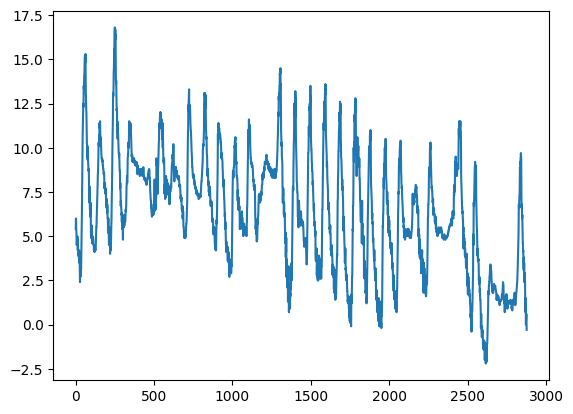

In [44]:
# SOLUZIONE

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

meteo.Temp.plot()
plt.show()

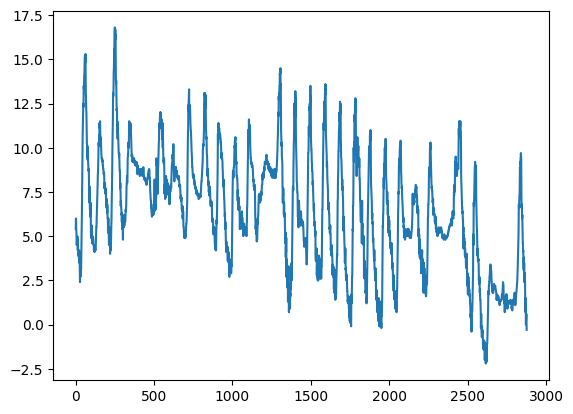

### 4.6 Esercizio - Pressione meteo e pioggia

✪ Nello stesso plot di sopra mostra la pressione e l'ammontare di pioggia.

In [45]:
# scrivi qui




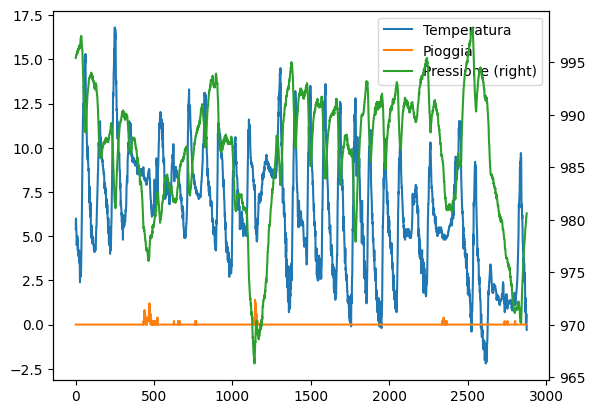

In [46]:
# SOLUZIONE

meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Pioggia.plot(label="Pioggia", legend=True)
meteo.Pressione.plot(secondary_y=True, label="Pressione", legend=True);
plt.show()

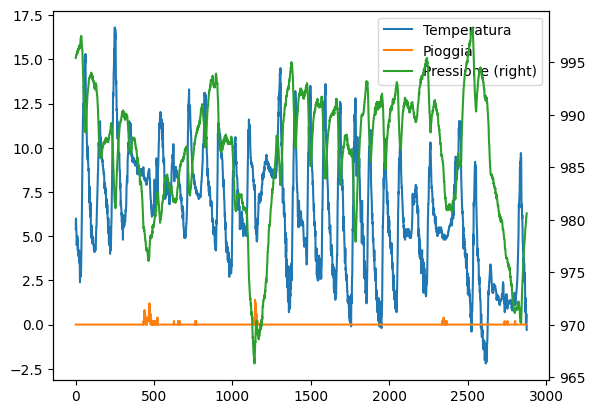

## 5. Valori object e stringhe

In generale, quando vogliamo manipolare oggetti di un tipo conosciuto, diciamo stringhe che hanno il tipo `str`, possiamo scrivere `.str` dopo una serie e poi trattare il risultato come se fosse una stringa singola, usando un qualsiasi operatore (es: slice) o un metodo consentito da quella particolare classe, o altri forniti da pandas.

Per il testo in particolare ci sono vari modi di manipolarlo, qua ne indichiamo un paio, per maggiori dettagli vedere [la documentazione di pandas](https://pandas.pydata.org/pandas-docs/stable/text.html).

### 5.1 Filtrare per valori testuali

Quando vogliamo filtrare per valori testuali, possiamo usare `.str.contains`, qua per esempio selezioniamo tutte le rilevazioni degli ultimi giorni di febbraio (che hanno quindi il timestamp che contiene `2016-02-2`) : 

In [47]:
df[  df['time_stamp'].str.contains('2016-02-2')  ]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
30442,2016-02-20 00:00:00,32.30,28.12,25.59,45.05,1008.01,1.47,51.82,51.18,9.215883,-12.947023,4.066202,-0.000612,0.018792,0.014558,-0.000042,0.000275,0.000157,0
30443,2016-02-20 00:00:10,32.25,28.13,25.59,44.82,1008.02,0.81,51.53,52.21,8.710130,-13.143595,3.499386,-0.000718,0.019290,0.014667,0.000260,0.001011,0.000149,0
30444,2016-02-20 00:00:41,33.07,28.13,25.59,45.08,1008.09,0.68,51.69,57.36,7.383435,-13.827667,4.438656,-0.000700,0.018714,0.014598,0.000299,0.000343,-0.000025,0
30445,2016-02-20 00:00:50,32.63,28.10,25.60,44.87,1008.07,1.42,52.13,59.95,7.292313,-13.999682,4.517029,-0.000657,0.018857,0.014565,0.000160,0.000349,-0.000190,0
30446,2016-02-20 00:01:01,32.55,28.11,25.60,44.94,1008.07,1.41,51.86,61.83,6.699141,-14.065591,4.448778,-0.000678,0.018871,0.014564,-0.000608,-0.000381,-0.000243,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0


<div class="alert alert-warning">
    
**ATTENZIONE: NON usare l'operatore** `in`:     
    
Potresti essere tentato di usarlo per filtrare  ma scoprirai presto che non funziona. Il motivo è che `in` produce _un_ solo valore ma quando filtriamo vogliamo produrre una serie di booleani con $n$ valori, uno per riga
</div>    

In [48]:
# Prova a verificare che succede se lo usi:



### 5.2 Estrarre stringhe

Per estrarre solo il giorno dalla colonna `time_stamp`, possiamo usare `str` con l'operatore slice e parentesi quadre:

In [50]:
df['time_stamp'].str[8:10]  

0         16
1         16
2         16
3         16
4         16
          ..
110864    29
110865    29
110866    29
110867    29
110868    29
Name: time_stamp, Length: 110869, dtype: object

## 6. Operazioni su colonne

Vediamo ora come selezionare, aggiungere e trasformare colonne.

### 6.1 - Selezionare colonne

Se vogliamo un sotto-insieme di colonne, possiamo indicare i nomi in una lista così:

**NOTA**: dentro le quadre esterne c'è una semplice lista di stringhe senza `df`!

In [51]:
df[  ['temp_h', 'temp_p', 'time_stamp']  ]

,temp_h,temp_p,time_stamp
0,27.57,25.01,2016-02-16 10:44:40
1,27.53,25.01,2016-02-16 10:44:50
2,27.53,25.01,2016-02-16 10:45:00
3,27.52,25.01,2016-02-16 10:45:10
4,27.54,25.01,2016-02-16 10:45:20
...,...,...,...
110864,27.52,24.83,2016-02-29 09:24:21
110865,27.50,24.83,2016-02-29 09:24:30
110866,27.50,24.83,2016-02-29 09:24:41
110867,27.50,24.83,2016-02-29 09:24:50


Come sempre la selezione di colonne non cambia il dataframe originale:

In [52]:
df.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0


### 6.2 - Aggiungere colonne

E' possibile ottenere nuove colonne effettuando calcoli da campi di altri colonne in modo molto naturale. Per esempio, qua ricaviamo la nuova colonna `mag_tot`, cioè il campo magnetico assoluto rilevato dalla stazione spaziale ricavandolo a partire da `mag_x`, `mag_y`, e `mag_z`, e poi la plottiamo:

In [53]:
df['mag_tot'] = df['mag_x']**2 + df['mag_y']**2 + df['mag_z']**2

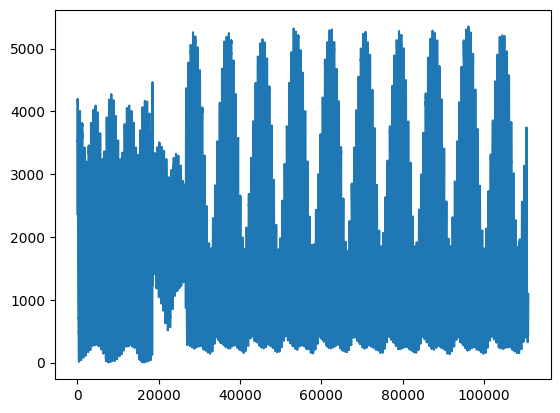

In [54]:
df.mag_tot.plot()
plt.show()

Troviamo quando il campo magnetico era al massimo: 

In [55]:
df['time_stamp'][df.mag_tot == df.mag_tot.values.max()]

96156    2016-02-27 16:12:31
Name: time_stamp, dtype: object

Prova a inserire il valore trovato sul sito [isstracker.com/historical](http://www.isstracker.com/historical) per rilevare la posizione in cui il campo magnetico è più forte.

### 6.2.1 Esercizio - temperatura meteo in Fahrenheit 

Nel dataframe `meteo`, crea una colonna `TempFahrenheit` con la temperatura misurata in gradi Fahrenheit

Formula per calcolare la conversione dai gradi Celsius (C):

$Fahrenheit = \frac{9}{5}C + 32$

In [56]:
# scrivi qui



In [57]:
# SOLUZIONE
print()
print("       **************  OUTPUT SOLUZIONE  **************")
meteo['TempFahrenheit'] = meteo['Temp']* 9/5 + 32 
meteo.head()


       **************  OUTPUT SOLUZIONE  **************


,Data,Pressione,Pioggia,Temp,TempFahrenheit
0,01/11/2017 00:00,995.4,0.0,5.4,41.72
1,01/11/2017 00:15,995.5,0.0,6.0,42.80
2,01/11/2017 00:30,995.5,0.0,5.9,42.62
3,01/11/2017 00:45,995.7,0.0,5.4,41.72
4,01/11/2017 01:00,995.7,0.0,5.3,41.54



       **************  OUTPUT SOLUZIONE  **************


,Data,Pressione,Pioggia,Temp,TempFahrenheit
0,01/11/2017 00:00,995.4,0.0,5.4,41.72
1,01/11/2017 00:15,995.5,0.0,6.0,42.80
2,01/11/2017 00:30,995.5,0.0,5.9,42.62
3,01/11/2017 00:45,995.7,0.0,5.4,41.72
4,01/11/2017 01:00,995.7,0.0,5.3,41.54


### 6.2.2 Esercizio - Pressione vs Temperatura

Secondo la [Legge di Gay-Lussac](https://en.wikipedia.org/wiki/Gay-Lussac%27s_law), in un ambiente chiuso la pressione dovrebbe essere direttamente proporzionale alla temperatura:

$\frac{P}{T} = k$

E' vero per il dataset del `meteo`? Prova a scoprirlo calcolando direttamente la formula e comparando con i risultati del metodo `corr()`.

In [58]:
# SOLUZIONE


# come atteso, in un ambiente aperto non c'è molta correlazione lineare
#meteo.corr()
#meteo['Pressione'] / meteo['Temp']

### 6.3 Scrivere colonne filtrate con `loc`

Se vogliamo scrivere solo in alcune righe di colonne (esistenti o nuove), possiamo farlo con la properietà `.loc` 

Per esempio, proviamo a scrivere il valore `True` nella nuova colonna `'cpu_troppo_calda'` nelle sole righe dove la temperatura cpu è eccessiva:

In [59]:
df.loc[ (df.temp_cpu > 31.68), 'cpu_troppo_calda' ] = True 

Vediamo la tabella risultante (scorri fino in fondo per vedere la nuova colonna). Notiamo come i valori delle righe che non abbiamo filtrato vengono rappresentati con  `NaN`, che letteralmente significa [not a number](https://it.softpython.org/matrices-numpy/matrices-numpy1-sol.html#NaN-e-infinit%C3%A0): 

In [60]:
df.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,mag_tot,cpu_troppo_calda
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2368.337207,True
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2615.870247,True
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2648.484927,NaN
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2665.305485,True
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2732.388620,NaN


### 6.4 Scrivere colonne filtrate con `np.where`



Pandas è una libreria molto flessibile, e fornisce diversi modi per ottenere gli stessi obbiettivi. 

Per esempio, se vogliamo scrivere in una colonna dei valori in corrispondenza di righe per cui un filtro è soddisfatto, e altri valori nel caso non lo sia, si può usare un solo comando `np.where`.

Proviamo ad aggiungere una colonna `'controllo_pressione'` che mi dice se la pressione è `sotto` o `sopra` la media (scorri fino in fondo per vederla):

In [61]:
pressione_media = df.pressure.values.mean()

In [62]:
df['controllo_pressione'] = np.where(df.pressure <= pressione_media, 'sotto', 'sopra')

In [63]:
df.iloc[29735:29745]  # selezioniamo delle righe per vedere variazioni

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,mag_tot,cpu_troppo_calda,controllo_pressione
29735,2016-02-19 22:00:51,32.24,28.03,25.52,44.55,1008.11,1.83,52.10,272.50,0.666420,...,-0.000630,0.018846,0.014576,0.000127,0.000002,0.000234,0,481.466349,True,sotto
29736,2016-02-19 22:01:00,32.18,28.05,25.52,44.44,1008.11,1.16,51.73,273.26,1.028125,...,-0.000606,0.018716,0.014755,0.000536,0.000550,0.000103,0,476.982306,True,sotto
29737,2016-02-19 22:01:11,32.22,28.04,25.52,44.40,1008.12,2.10,52.16,274.66,1.416078,...,-0.000736,0.018774,0.014626,0.000717,0.000991,0.000309,0,484.654588,True,sotto
29738,2016-02-19 22:01:20,32.18,28.04,25.52,44.38,1008.14,1.38,52.01,275.22,1.702723,...,-0.000595,0.018928,0.014649,0.000068,0.000222,0.000034,0,485.716793,True,sopra
29739,2016-02-19 22:01:30,32.24,28.03,25.52,44.43,1008.10,1.42,51.98,275.80,1.910006,...,-0.000619,0.018701,0.014606,-0.000093,-0.000080,0.000018,0,481.830794,True,sotto
29740,2016-02-19 22:01:40,32.26,28.04,25.52,44.37,1008.11,1.47,52.08,277.11,2.413142,...,-0.000574,0.018719,0.014614,0.000451,0.000524,0.000078,0,486.220778,True,sotto
29741,2016-02-19 22:01:50,32.22,28.04,25.52,44.49,1008.15,1.60,52.17,278.52,2.929722,...,-0.000692,0.018716,0.014602,0.000670,0.000455,0.000109,0,480.890508,True,sopra
29742,2016-02-19 22:02:01,32.21,28.04,25.52,44.48,1008.13,1.47,52.24,279.44,3.163792,...,-0.000639,0.019034,0.014692,0.000221,0.000553,0.000138,0,483.919953,True,sopra
29743,2016-02-19 22:02:10,32.23,28.05,25.52,44.45,1008.11,1.88,51.81,280.36,3.486707,...,-0.000599,0.018786,0.014833,-0.000020,0.000230,0.000134,0,476.163984,True,sotto
29744,2016-02-19 22:02:21,32.24,28.05,25.52,44.60,1008.12,1.26,51.83,281.22,3.937303,...,-0.000642,0.018701,0.014571,0.000042,0.000156,0.000071,0,478.775309,True,sotto


### 6.5 Trasformare colonne

Supponiamo di voler convertire tutti i valori della colonna umidità da float a interi.

Sappiamo che per convertire un singolo float in un intero c'è la funzione predefinita di Python `int`:

In [64]:
int(23.7)

23

Come applicare questa funzione a tutti gli elementi della colonna `humidity`?

Per farlo, possiamo chiamare il metodo `transform` e passargli l'oggetto funzione `int` _come parametro_

**NOTA**: non ci sono parentesi tonde dopo `int` !!!

In [65]:
df['humidity'].transform(int)

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

Per chiarire cosa voglia dire _passare una funzione_, vediamo altri due modi _completamente equivalenti_ che avremmo potuto usare per passare la funzione.

**Definire una funzione**: Avremmo potuto definire una funzione `mia_f` come questa (nota che la funzione DEVE RITORNARE qualcosa!)

In [66]:
def mia_f(x):
    return int(x)

df['humidity'].transform(mia_f)

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

**funzione lambda**: Avremmo potuto usare una [funzione lambda](https://it.softpython.org/functions/fun1-intro-sol.html#Funzioni-lambda), cioè una funzione senza un nome che è definita su una sola linea:

In [67]:
df['humidity'].transform( lambda x: int(x) )

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

Indipendentemente dal modo in cui scegliamo di passare la funzione, il metodo `tranform` NON cambia il dataframe originale:

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time_stamp           110869 non-null  object 
 1   temp_cpu             110869 non-null  float64
 2   temp_h               110869 non-null  float64
 3   temp_p               110869 non-null  float64
 4   humidity             110869 non-null  float64
 5   pressure             110869 non-null  float64
 6   pitch                110869 non-null  float64
 7   roll                 110869 non-null  float64
 8   yaw                  110869 non-null  float64
 9   mag_x                110869 non-null  float64
 10  mag_y                110869 non-null  float64
 11  mag_z                110869 non-null  float64
 12  accel_x              110869 non-null  float64
 13  accel_y              110869 non-null  float64
 14  accel_z              110869 non-null  float64
 15  gyro_x           

Se vogliamo aggiungere una nuova colonna, diciamo `humidity_int`, dobbiamo esplicitamente assegnare il risultato di `transform` alla nuova serie:

In [69]:
df['humidity_int'] = df['humidity'].transform( lambda x: int(x) )

Nota come pandas automaticamente inferisce il tipo `int64` per la colonna appena creata:

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time_stamp           110869 non-null  object 
 1   temp_cpu             110869 non-null  float64
 2   temp_h               110869 non-null  float64
 3   temp_p               110869 non-null  float64
 4   humidity             110869 non-null  float64
 5   pressure             110869 non-null  float64
 6   pitch                110869 non-null  float64
 7   roll                 110869 non-null  float64
 8   yaw                  110869 non-null  float64
 9   mag_x                110869 non-null  float64
 10  mag_y                110869 non-null  float64
 11  mag_z                110869 non-null  float64
 12  accel_x              110869 non-null  float64
 13  accel_y              110869 non-null  float64
 14  accel_z              110869 non-null  float64
 15  gyro_x           

## 7. Altri esercizi

### 7.1 Esercizio - Inquinanti aria

Proviamo ad analizzare i dati orari delle stazioni di monitoraggio della qualità dell'aria della Provincia Autonoma di Trento validati dall'Agenzia per l'ambiente.

Fonte: [dati.trentino.it](https://dati.trentino.it/dataset/qualita-dell-aria-rilevazioni-delle-stazioni-monitoraggio)

#### 7.1.1 - caricare il file

✪ Carica in pandas il file [aria.csv](aria.csv)

**IMPORTANTE 1**: metti il dataframe nella variabile `aria`, così da non confonderlo coi dataframe precedenti


**IMPORTANTE 2**: metti come encoding `'latin-1'` (altrimenti a seconda del tuo sistema operativo potrebbe non caricarlo dando strani messaggi d'errore)

**IMPORTANTE 3**: se ricevi altri strani messaggi d'errore, aggiungi anche il parametro `engine=python`

In [71]:

# scrivi qui

import pandas as pd   
import numpy as np    

# ricordati l'encoding !
aria = pd.read_csv('aria.csv', encoding='latin-1')
aria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20693 entries, 0 to 20692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stazione         20693 non-null  object 
 1   Inquinante       20693 non-null  object 
 2   Data             20693 non-null  object 
 3   Ora              20693 non-null  int64  
 4   Valore           20693 non-null  float64
 5   Unità di misura  20693 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 970.1+ KB


In [71]:

# scrivi qui



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20693 entries, 0 to 20692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stazione         20693 non-null  object 
 1   Inquinante       20693 non-null  object 
 2   Data             20693 non-null  object 
 3   Ora              20693 non-null  int64  
 4   Valore           20693 non-null  float64
 5   Unità di misura  20693 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 970.1+ KB


#### 7.1.2 - media inquinanti

✪ Trova la media dei valori di inquinanti `PM10` al `Parco S. Chiara` (media su tutte le giornate). Dovresti ottenere il valore `11.385752688172044`

In [72]:
# scrivi qui

aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10')].Valore.values.mean()

11.385752688172044

In [72]:
# scrivi qui



11.385752688172044


#### 7.1.3 - Grafico PM10

✪ Usando `plt.plot` come visto in un [esempio precedente](#Grafici-matplotlib-da-strutture-pandas) (quindi passandogli direttamente le serie rilevanti di Pandas), mostra in un grafico l'andamento dei valori di inquinanti `PM10` nella giornata del 7 Maggio 2019

In [75]:
# scrivi qui




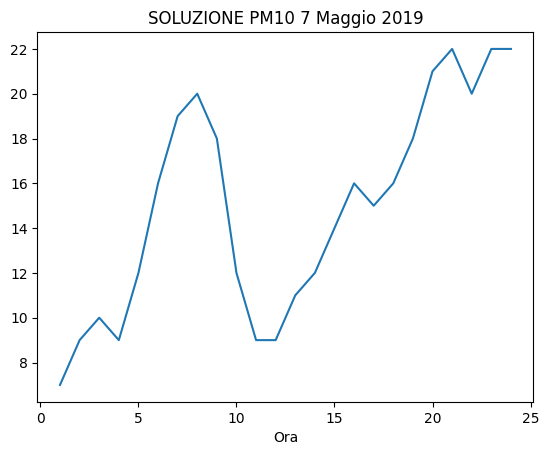

In [76]:
# SOLUZIONE

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

filtrato = aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10') & (aria.Data == '2019-05-07')]

plt.plot(filtrato['Ora'], filtrato['Valore'] )
plt.title('SOLUZIONE PM10 7 Maggio 2019')
plt.xlabel('Ora')
plt.show()

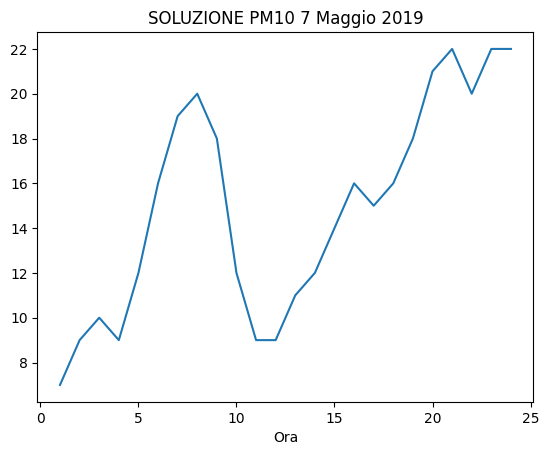

### 7.2 Esercizio - Game of Thrones

Apri con Pandas il file [game-of-thrones.csv](game-of-thrones.csv) che contiene gli episodi in varie annate. 

- usa l'encoding `UTF-8`
- **IMPORTANTE**: metti il dataframe nella variabile `game`, così da non confonderlo coi dataframe precedenti

Data source:  [Kaggle](https://www.kaggle.com/datasets/bakar31/game-of-thronesgot) - License: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)

#### 7.2.1 Esercizio - fan

Ti viene fornito un dizionario `preferiti` con gli episodi preferiti di un gruppo di persone, che però non si ricordano esattamente i vari titoli che sono quindi spesso incompleti: Seleziona gli episodi preferiti da Paolo e Chiara

- assumi che la capitalizzazione in `preferiti` sia quella corretta
- **NOTA**: il dataset contiene insidiose doppie virgolette `"` attorno ai titoli, ma se scrivi il codice nel modo giusto questo non dovrebbe essere un problema

In [77]:

import pandas as pd
import numpy as np    

preferiti = {
    "Paolo" : 'Winter Is',
    "Chiara" : 'Wolf and the Lion',
    "Anselmo" : 'Fire and',
    "Letizia" : 'Garden of'
}


# scrivi qui
game = pd.read_csv('game-of-thrones.csv', encoding='UTF-8')

titolidf = game[  (game["Title"].str.contains(preferiti['Paolo'])) | (game["Title"].str.contains(preferiti['Chiara']))] 

titolidf

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1


In [77]:

import pandas as pd
import numpy as np    

preferiti = {
    "Paolo" : 'Winter Is',
    "Chiara" : 'Wolf and the Lion',
    "Anselmo" : 'Fire and',
    "Letizia" : 'Garden of'
}


# scrivi qui



,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1


#### 7.2.2  Esercizio - prima messa in onda


Seleziona tutti gli episodi che sono stati mandati per la prima volta in onda in un certo `anno` (colonna `Original air date`)

- **NOTA**: `anno` ti viene fornito come `int`

In [78]:
anno = 17

# scrivi qui
annidf = game[ game['Original air date'].str[-2:] == str(anno)  ]
annidf

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
61,62,2,7,"""Stormborn""",Mark Mylod,Bryan Cogman,Outline from A Dream of Spring and original co...,23-Jul-17,9.27,8.9
62,63,3,7,"""The Queen's Justice""",Mark Mylod,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,30-Jul-17,9.25,9.2
63,64,4,7,"""The Spoils of War""",Matt Shakman,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,6-Aug-17,10.17,9.8
64,65,5,7,"""Eastwatch""",Matt Shakman,Dave Hill,Outline from A Dream of Spring and original co...,13-Aug-17,10.72,8.8
65,66,6,7,"""Beyond the Wall""",Alan Taylor,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,20-Aug-17,10.24,9.0
66,67,7,7,"""The Dragon and the Wolf""",Jeremy Podeswa,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,27-Aug-17,12.07,9.4


In [78]:
anno = 17

# scrivi qui



,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
61,62,2,7,"""Stormborn""",Mark Mylod,Bryan Cogman,Outline from A Dream of Spring and original co...,23-Jul-17,9.27,8.9
62,63,3,7,"""The Queen's Justice""",Mark Mylod,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,30-Jul-17,9.25,9.2
63,64,4,7,"""The Spoils of War""",Matt Shakman,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,6-Aug-17,10.17,9.8
64,65,5,7,"""Eastwatch""",Matt Shakman,Dave Hill,Outline from A Dream of Spring and original co...,13-Aug-17,10.72,8.8
65,66,6,7,"""Beyond the Wall""",Alan Taylor,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,20-Aug-17,10.24,9.0
66,67,7,7,"""The Dragon and the Wolf""",Jeremy Podeswa,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,27-Aug-17,12.07,9.4


### 7.3 Esercizio - Strutture sanitarie

✪✪ Esaminiamo ora il dataset [SANSTRUT001.csv](SANSTRUT001.csv) che contiene le strutture sanitarie del Trentino, e per ciascuna indica il tipo di assistenza che offre (attività clinica, diagnostica, etc), con il CAP e il nome del comune dove si trova.

Fonte dati: [dati.trentino.it](https://dati.trentino.it/dataset/strutture-sanitarie-dell-azienda-sanitaria-e-convenzionate) Licenza: [Creative Commons Attribution 4.0](http://creativecommons.org/licenses/by/4.0/deed.it)

Scrivi una funzione che prende in input un codice comune e una stringa di testo, apre  **con pandas** (encoding UTF-8) e:

1. STAMPA anche il numero di righe trovate.
2. RITORNA un dataframe con selezionate solo le righe aventi quel codice comune e che contengono la stringa nella colonna `ASSISTENZA`. Il dataset ritornato deve avere solo le colonne `STRUTTURA`, `ASSISTENZA`, `COD_COMUNE`, `COMUNE`. 

In [79]:
import pandas as pd   
import numpy as np    

def strutsan(cod_comune, assistenza):
    
    print('***** SOLUZIONE')    
    strudf = pd.read_csv('SANSTRUT001.csv', encoding='UTF-8')    
    res = strudf[((strudf['COD_COMUNE'] == cod_comune) & strudf['ASSISTENZA'].str.contains(assistenza))]    
    
    print("Trovate", res.shape[0], "strutture")
    return res[ ['STRUTTURA', 'ASSISTENZA', 'COD_COMUNE', 'COMUNE']  ]
    


In [79]:
import pandas as pd   
import numpy as np    

def strutsan(cod_comune, assistenza):
    raise Exception('TODO IMPLEMENT ME !')


In [80]:
strutsan(22050, '')  # nessun filtro assistenza

***** SOLUZIONE
Trovate 6 strutture


,STRUTTURA,ASSISTENZA,COD_COMUNE,COMUNE
0,PRESIDIO OSPEDALIERO DI CAVALESE,ATTIVITA` CLINICA,22050,CAVALESE
1,PRESIDIO OSPEDALIERO DI CAVALESE,DIAGNOSTICA STRUMENTALE E PER IMMAGINI,22050,CAVALESE
2,PRESIDIO OSPEDALIERO DI CAVALESE,ATTIVITA` DI LABORATORIO,22050,CAVALESE
3,CENTRO SALUTE MENTALE CAVALESE,ASSISTENZA PSICHIATRICA,22050,CAVALESE
4,CENTRO DIALISI CAVALESE,ATTIVITA` CLINICA,22050,CAVALESE
5,CONSULTORIO CAVALESE,ATTIVITA` DI CONSULTORIO MATERNO-INFANTILE,22050,CAVALESE


In [81]:
strutsan(22205, 'CLINICA')

***** SOLUZIONE
Trovate 16 strutture


,STRUTTURA,ASSISTENZA,COD_COMUNE,COMUNE
59,PRESIDIO OSPEDALIERO S.CHIARA,ATTIVITA` CLINICA,22205,TRENTO
62,CENTRO DIALISI TRENTO,ATTIVITA` CLINICA,22205,TRENTO
63,POLIAMBULATORI S.CHIARA,ATTIVITA` CLINICA,22205,TRENTO
64,PRESIDIO OSPEDALIERO VILLA IGEA,ATTIVITA` CLINICA,22205,TRENTO
73,OSPEDALE CLASSIFICATO S.CAMILLO,ATTIVITA` CLINICA,22205,TRENTO
84,NEUROPSICHIATRIA INFANTILE - UONPI 1,ATTIVITA` CLINICA,22205,TRENTO
87,CASA DI CURA VILLA BIANCA SPA,ATTIVITA` CLINICA,22205,TRENTO
90,CENTRO SERVIZI SANITARI,ATTIVITA` CLINICA,22205,TRENTO
93,PSICOLOGIA CLINICA,ATTIVITA` CLINICA,22205,TRENTO
122,"ASSOCIAZIONE TRENTINA SCLEROSI MULTIPLA, ONLUS",ATTIVITA` CLINICA,22205,TRENTO


In [82]:
strutsan(22205, 'LABORATORIO')

***** SOLUZIONE
Trovate 5 strutture


,STRUTTURA,ASSISTENZA,COD_COMUNE,COMUNE
61,PRESIDIO OSPEDALIERO S.CHIARA,ATTIVITA` DI LABORATORIO,22205,TRENTO
85,LABORATORI ADIGE SRL,ATTIVITA` DI LABORATORIO,22205,TRENTO
86,LABORATORIO DRUSO SRL,ATTIVITA` DI LABORATORIO,22205,TRENTO
89,CASA DI CURA VILLA BIANCA SPA,ATTIVITA` DI LABORATORIO,22205,TRENTO
92,CENTRO SERVIZI SANITARI,ATTIVITA` DI LABORATORIO,22205,TRENTO


## Prosegui

Continua con  [operazioni un po' più avanzate](https://it.softpython.org/pandas/pandas2-advanced-sol.html)